# **Project Name**    -  **Cardiovascular_Risk_Prediction**



##### **Project Type**    - Classification

##### **Contribution**    - Individual

##### **Name**           - **Vikas Kumar**


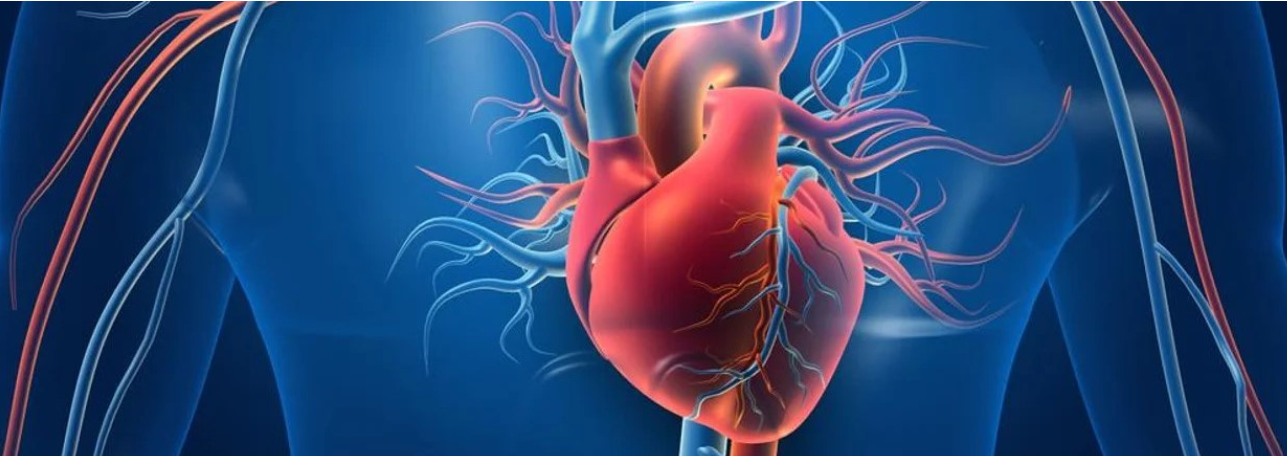

# **Project Summary -**

Write the summary here within 500-600 words.

Information about the patients is provided from the **Cardiovascular Risk Prediction dataset**. Data from *3,390 people* are included in the dataset along with **16 predictor factors and 1 target variable**. Each variable (attribute) carries the possibility of being significant. Risk factors include those related to **demographics, behaviour, and health.** To estimate the 10-year risk of getting coronary heart disease was our goal (CHD).

The most prevalent form of heart disease, **coronary heart disease (CHD), claims the lives of over 382,820 people each year**. In the US, heart disease claims the lives of about** 697,000 people annually**, or *1 in 5 deaths*.

I followed following steps:

1. I began by mounting the drive, **importing the required libraries**, and saving the data in variables in order to gain insightful conclusions. The next phase was **data analysis and visualisation**, where I used univariate, bivariate, and multivariate plots to assess our data distribution using a "UBM rule"*. I made an effort to extract "valuable insights" from the dataset using several graphs.

2. After comprehending the **data and obtaining variables**, we first **collected and cleaned the data, managed the null values** by examining the **distribution and outliers in the data**, and typecast the necessary features into the necessary format in order to correctly depict them. We conducted extensive **EDA and plotted various graph** types by categorising them into **univariate, bivariate, and multivariate categories** as a result, We discovered some significant insights that helped us to make future judgements in ML model pipeline.

3. Then, **utilising feature engineering and data preprocessing**, we were able to extract new features such as pulse pressure and glucose diabetes with the aid of other factors that did not directly affect** tenYearCHD**. Using the aid of **various inflation factors,** we additionally attempted to obtain some influencing aspects by **eliminating multicollinearity** within the **independent variables (VIF)**. We have not dealt with outliers in this dataset because doing so can result in the loss of crucial data and skewed findings. Also, we observed that some of the features had a categorical aspect, and the ML model is unable to comprehend the language of alphabets (strings). In order to convert them to numbers, **we used BINARY LABEL ENCODING.**

4. I "divided" the data into **train (80%) and test (20%)** halves to put into various algorithms. I also used *MinMaxScaler to make sure that all features were scaled similarly. I utilised SMOTE* to construct a **balanced set of data** because our data was so severely unbalanced.

5. The next stage was to train a model using several methods; I attempted 5 different models, including the **Logistic Regression Classifier**, R**andom Forest Classifier, Gaussian Naive Bayes Classifier, XG Boost Classifier, and K-Nearest Neighbors Classifier. **Due to the significant cost of False Negatives in a dataset from the medical industry, I chose **"Recall" as the model metric while choosing the most effective machine learning model**. 

6. **The K-Nearest Neighbors Classifier produced the best results both before and after cross-validation and hyper-parameter adjustment. AUC of 0.884 and recall and precision of 0.88 are both respectable values. K-Nearest Neighbors Classifier is the model I've decided is the best fit for this particular dataset.**

Overall, we used a c**ombination of data processing, machine learning, and model evaluation skills** when developing a machine learning model using cardiovascular risk prediction data. Although it was a difficult task and we had some setbacks, with the appropriate strategy and information, we were able to develop a model that can reliably identify a patient who may have CHD in the future.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/vks2268/Cardiovascular-Risk-Prediction

# **Problem Statement**


## The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict wheater the patient has a 10- year risk of future coronary hear disease (CHD). The dataset provides the patients. imformation. It includes over 4,000 records and 15 attributes. Each attributes is a potential risk factor. There are both demographic, behaviroal, and medical risk factors.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

     
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score,f1_score

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

import xgboost as xgb
from sklearn import tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn import ensemble
from collections import Counter

%matplotlib inline

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

In [ ]:
# Load Dataset
df_cv = pd.read_csv("/content/drive/MyDrive/Capstone project 3_classification/data_cardiovascular_risk.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df_cv.head()

In [ ]:
df_cv.head().T

In [ ]:
df_cv.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df_cv.shape

Here 2290 rows and 17 columns in the dataset

### Dataset Information

In [ ]:
# Dataset Info
df_cv.info()

In [ ]:
df_cv.nunique()

In [ ]:
df_cv.columns

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df_cv.duplicated().sum()

So there is not any deplicate values in this dataset. 

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df_cv.isnull().sum().sort_values(ascending = False)

Here we got the missing values as follow:

Glucose = 304

education = 87

BPmeds = 44

totchol = 38

cigsPerDay = 22

BMI = 14

id =1

In [ ]:
# Visualizing the missing values
fig = plt.figure(figsize=(18, 6))
sns.heatmap(df_cv.isnull(),cbar=True)   

In [ ]:
round(df_cv.isna().sum().sort_values(ascending = False)/len(df_cv)*100, 2)

### What did you know about your dataset?

Answer Here

Of the 17 columns in the missing values visualisation shown above, 4 columns have no values. Education, BPMeds, total Chol, and Glucose are examples of columns with null values. The Glucose columns have the highest amount of missing values (304).



> **The dataset contain the 3390 rows and 17 columns.**

> **Approx 9% missing values in the glucose.**

> **In Education colum there is 2.57% of missing values.**






**We will replace the missing value with the using of median**

In [ ]:
# Replace this null/missing values with the median
for col in ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
  df_cv[col] = df_cv[col].fillna(df_cv[col].median())

In [ ]:
df_cv.isnull().sum()

In [ ]:
sns.heatmap(df_cv.isnull())

## ***2. Understanding Your Variables***

Variables and their significance are crucial to any machine learning model. As a result, the step "Understanding Your Variables" is one of the most crucial. In this kind of data exploration, we look at the numerical columns, look at the variable descriptions, and generally try to learn more about our variables and data.

In [ ]:
# Dataset Columns
df_cv.columns

In [ ]:
# Dataset Describe
df_cv.describe().T

Because there is such a big discrepancy between the 75% percentile value and the highest value, there is skewness and outliers in the continuous characteristics "cigsperday," "totchol," "sysbp," "diebp," "BMI," "heartrate," and "glucose," as can be seen in the statistical summary.

In [ ]:
df_cv.describe(include = 'all').T

### Variables Description 

**Demographic**:

• **Age:** The patient's age; (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

• **Sex:** either a man or woman ("M" or "F")

• **Education:** The individual's educational history (1,2,3,4)

**Medical history:**

• **BP Meds:** whether or not the patient was taking any (Nominal)

• **Prevalent Stroke:** the existence of prior strokes in the patient (Nominal)

• **Prevalent Hyp:** whether the patient had high blood pressure (Nominal)

• **Diabetes:** the presence or absence of diabetes in the patient (Nominal)

**Behavioral:**

• **is smoking:** Indicates if the patient currently smokes or not ("YES" or "NO")

• **Cigs Per Day:** The average number of cigarettes smoked by an individual each day (can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Current Medical Issues:**

• **Tot Chol:** total cholesterol level (Continuous)

• **Sys BP:** systolic blood pressure (Continuous)

• **Dia BP:** diastolic blood pressure (Continuous)

• **BMI:** Body Mass Index (Continuous)

• **Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• **Glucose:** glucose level (Continuous)

**Target Variable:**

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)



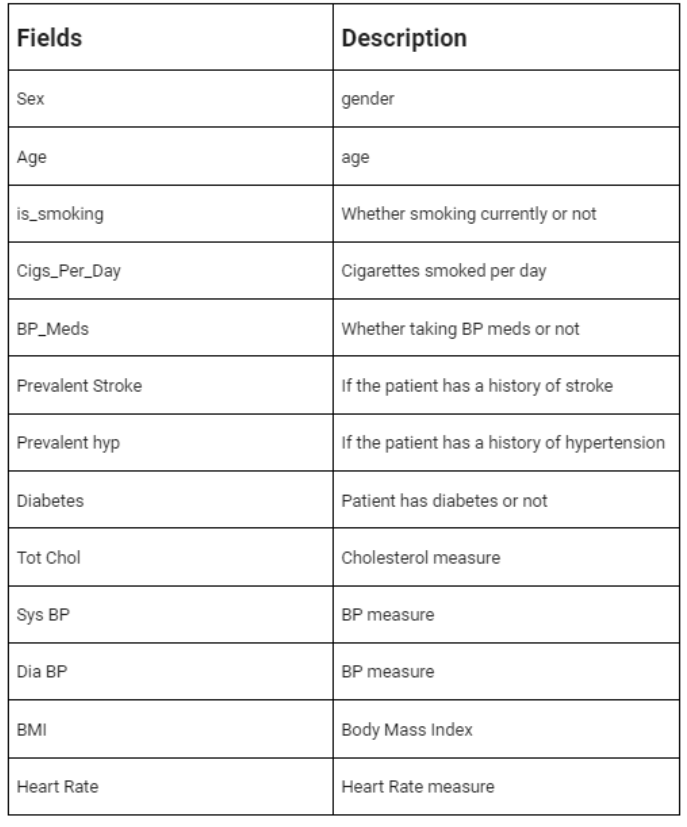

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df_cv.columns.tolist():
  unique_val = df_cv[i].nunique()
  print("Number of unique values in ",i,"is",unique_val)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df_cv.head()

In [ ]:
#droping the unnecessary columns
df_cv.drop(['id'] , axis = 1,inplace= True)

In [ ]:
#Now we seperated our Categorical and Numerical data

categorical_data = [i for i in df_cv.columns if df_cv[i].nunique()<=4]
categorical_data

In [ ]:
numerical_data = [i for i in df_cv.columns if i not in categorical_data]
numerical_data

In [ ]:
#There is a 10-year chance of developing coronary heart disease (CHD) for the whole patient count or not.
df_cv['TenYearCHD'].value_counts().reset_index()

TenYearCHD is the dependent variable in this case, and it is obvious that our data is unbalanced because only **16% (511/3390)** of the total dataset falls into the**"1" or "Yes" category**, while the remaining **2879/3390 fall into the "0" or "No" category**. When constructing a model for this, we can run into several challenges.

In [ ]:
age_num = df_cv['age'].value_counts().reset_index()
print(f"maximum age in the age columns is = {age_num['index'].max()}")
print(f"Minmum age in the age columns is = {age_num['index'].min()}")
age_num 

In [ ]:
# Now we do groupby of two numerical data i.e 'age' and 'cigsPerDay'
age_vs_cigsPerDay = df_cv.groupby(['age'])['cigsPerDay'].mean().reset_index()
age_vs_cigsPerDay

In [ ]:
numerical_data

In [ ]:
 #Now we do groupby of numerical data i.e 'age' and 'cigsPerDay','totChol','sysBP'
age_wise_analysis = df_cv.groupby(['age'])['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'].mean()
age_wise_analysis

In [ ]:
TenYearCHD_wise_analysis = df_cv.groupby(['TenYearCHD'])['age'].mean().reset_index()
TenYearCHD_wise_analysis

In [ ]:
TenYearCHD_wise_analysis = df_cv.groupby(['TenYearCHD'])['education'].mean().reset_index()
TenYearCHD_wise_analysis

### What all manipulations have you done and insights you found?

Answer Here. 

*   As most of our category features are binary in nature, their values fall between 0 and 1. (with a few exceptions). Each one has a different set of continuous and range values when it comes to the numerical aspects.
*   TenYearCHD is the dependent variable in this case, and it is obvious that our data is unbalanced because only 16% (511/3390) of the total dataset falls into the"1" or "Yes" category, while the remaining 2879/3390 fall into the "0" or "No" category. When constructing a model for this, we can run into several challenges.




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Exploratory data analysis is the process of running preliminary checks on the data to look for different patterns. It aids in identifying data anomalies that are present. It is a well-defined technique to interpreting the data's story since it aids in comprehending the connections between various factors. Visualizations allow us to deduce how to handle missing values and transform variables as necessary.

#### Chart - 1

In [ ]:
df_cv.head()

In [ ]:
print(categorical_data)
print(numerical_data)

## Analysis and visulization of all data
## **Univarient analysys**

Univariate analysis investigates each variable (attribute) separately. There are two types of variables: category and numerical. It doesn't deal with causes or relationships because "Uni" means "one," and its primary goal is to describe, which implies that it gathers data, summarises that data, and looks for patterns in the data. For each sort of variable, there are several statistical and visualisation methods of inquiry. I've used the **histplot,countplot and distplot** in this case.

In [ ]:
# Chart - 1 visualization code
fig = plt.figure(figsize = (16,20))
ax = fig.gca()
df_cv.hist(ax = ax)
plt.show()

##### 1. Why did you pick the specific chart?

To plot the histgram of all the dataset and check how is its frequency distribusion.

##### 2. What is/are the insight(s) found from the chart?

From above distribution plot we can say that the data on the prevalent stroke, diabetes, and blood pressure meds are poorly balanced.



#### Chart - 2 **data distribution visulization of numerical data**

##**Univariant analysis**

In [ ]:
numerical_data

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(15,10))
for n, col in enumerate(numerical_data[:]):
  plt.subplot(4,3, n+1)
  sns.distplot((df_cv[col]))
  plt.title({col.title()})
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

I decided to use a distplot to examine the distribution of numerical features.

##### 2. What is/are the insight(s) found from the chart?

I noticed that some of the numerical features, including totChol, sysBP, BMI, and glucose, are slightly right skewed from the distribution plot of numerical data shown above.


> Most glucose readings go below 150.

> Most totChol values—nearly 90%—fall between 50 and 400.

Answer Here

#### Chart - 3 Histrogram plot of numerical data

In [ ]:
# Chart - 3 visualization code
# we will visulize the mean and median
plt.figure(figsize=(15,12))
for n,column in enumerate(numerical_data):
  features_var = df_cv[column]
  ax=plt.subplot(5, 4, n+1)
  sns.histplot(features_var)
  ax.axvline(features_var.mean(), color='green', linestyle='dashed', linewidth=3)
  ax.axvline(features_var.median(), color='blue', linestyle='dashed', linewidth=3)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Here we choosed the histrogram plot of the numerical data. and check its frequecy distribustion of the data.
Since data is typically presented in the form of certain groups, histograms have been used to show the distribution of columns containing numerical data. It is an accurate way for displaying the distribution of numerical data graphically. It is a type of bar plot where the X-axis shows the bin ranges and the Y-axis provides frequency information.

##### 2. What is/are the insight(s) found from the chart?

The revelations we made include:

The majority of the people in the sample are in their 40s to 60s, while there are a few who are under 30 or over 70.

The histogram can indicate that most people in the sample smoke less than 10 cigarettes per day, with a few people smoking more than 20 cigarettes per day.

Few people in the sample had total cholesterol levels below 160 mg/dL or above 300 mg/dL, however the bulk of people in the dataset have total cholesterol values between 200 and 250 mg/dL.

The majority of the people in the dataset have systolic blood pressure readings between 120 and 140 mmHg, with a small number of people having readings lower than 90 mmHg or higher than 160 mmHg.

Few people in the sample have diastolic blood pressure readings below 60 mmHg or beyond 100 mmHg, with the bulk of people having readings between 80 and 90 mmHg.

Few people in the sample had a body mass index below 18 or beyond 35, with the bulk of people in the dataset having a body mass index between 24-26.

Few people in the sample had heart rates below 50 beats per minute or beyond 100 beats per minute, however the bulk of people in the dataset have heart rates between 60 and 90 beats per minute.



#### Chart - 4 **Age distribution**

In [ ]:
# Chart - 4 visualization code
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x= 'age', data=df_cv , palette='husl')
ax.set_xlabel( 'age' , size = 13 )
ax.set_title( 'age value distribituon' , size = 16 )
plt.xticks(rotation=80);


##### 1. Why did you pick the specific chart?

I have chosen the countplot to visualise how the age is distributed.



##### 2. What is/are the insight(s) found from the chart?

The majority of the information pertains to adults who are 38 to 46 years old.

Minimal data for ages 32 to 34 and 68 to 70 are provided.

#### Chart - 5

## **Analysis of categorical_data columns**

In [ ]:
categorical_data

## Education data visulize

In [ ]:
# Chart - 5 visualization code
fig, ax = plt.subplots(figsize = (15,7))
sns.countplot(x= 'education' , data=df_cv , palette='dark')
ax.set_xlabel( 'education' , size = 13 )
ax.set_title( 'education columns data distribution' , size = 17 )

To show the distribution of educational attainment among those being assessed for their risk of cardiovascular disease, a donut chart has been drawn. Similar to a bar chart, this one has a few advantages and may be used to compare several categories or dimensions to the overall picture. We may compare various dimensions more easily using bar charts.

Education level 1 has more and least number has the education level 4

**TenYearCHD data distrubution**

In [ ]:
plt.figure(figsize=(17,6))
df_cv['TenYearCHD'].value_counts().plot(kind='pie', autopct='%1.1f%%' , fontsize=15 , shadow=True)
plt.title('Distribution of TenYearCHD', fontsize=20)

##### 1. Why did you pick the specific chart?

Took pie chart to compare two type of categorical data in the target variable in the percent form

##### 2. What is/are the insight(s) found from the chart?

Here  0 type has approx 84.9% but the 1 type has 15.1% data in this dataset of target variable.

#### Chart - 6  
## **Bivariate Analysis**


Compared to univariate analysis, bivariate analysis is a little more analytical. It seeks to make assessments of the two variables. To determine the link between two value sets, a single statistical analysis was utilised. In this instance, I have examined the relationships between several qualities and the target variable.

In [ ]:
df_cv.columns

**plot between numerical data vs TenYearCHD**

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(12,5))

plt.suptitle('numerical features data analysis with TenYearCHD', fontsize=21, fontweight='bold', y=1.03)

for i,col in enumerate(numerical_data):
  plt.subplot(2, 4, i+1)                     # subplots of 2 rows and 4 columns

  # regression plots
  sns.regplot(x=df_cv[col], y='TenYearCHD', data=df_cv)
  
  plt.xlabel(col)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

We used the above regression plot to demonstrate the link between numerical characteristics and the ten-year CHD. The main applications of regression plots include prediction, forecasting, time series modelling, and establishing the causal connection between variables.

##### 2. What is/are the insight(s) found from the chart?

Numerous Our goal variable and a number of independent numerical variables are connected and positively correlated.

#### Chart - 7 **plot between categorical features data vs TenYearCHD**




In [ ]:
categorical_data

In [ ]:
categorical_data_cv = categorical_data[:-1]
categorical_data_cv 

In [ ]:
# figsize
plt.figure(figsize=(12,6))
# title
plt.suptitle('Bivariate data analysis of categorical_data w.r.t TenYearCHD ', fontsize=15, fontweight='bold', y=1.03)

for i,col in enumerate(categorical_data_cv):       
  plt.subplot(2, 4, i+1)                                
  a = df_cv.groupby(col)[['TenYearCHD']].count().reset_index()

  # barplot
  sns.barplot(x=a[col], y=a['TenYearCHD'])
  # x-axis labelling
  plt.xlabel(col)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Here we choosed the bar plot to ploting between TenYearCHD VS categorical data set. And it give the better understanding of the dataset which is categorical 

#### Chart - 8  **age group vs TenYearCHD**
(by checking which age group has more possibility of being attacked to CHD)

In [ ]:
df_cv.columns

In [ ]:
# Chart - 8 visualization code

plt.figure(figsize=(20,8))
sns.barplot(x='age', y='TenYearCHD', data=df_cv)
plt.title("Which Age Group Is Most Prone to CHD?")
plt.show()

##### 1. Why did you pick the specific chart?

In order to determine which age group is more susceptible to heart disease, we created an age-CHD Probability plot.

##### 2. What is/are the insight(s) found from the chart?

We can observe that the age column and cardiovascular risk are related. The likelihood of developing cardiovascular disease rises with age. Older persons (those above 65) are more susceptible to heart diseases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can target every person, independent of their health conditions and lifestyle choices, as age is a significant role in cardiovascular risk. It is possible to raise awareness, which will benefit the wellness of all businesses and people.

#### Chart - 9 **Smokers vs non-smokers count with their age column**

In [ ]:
# Chart - 9 visualization code

plt.figure(figsize=(19,6))
ax= sns.countplot(x="age",hue="is_smoking",data=df_cv)
plt.legend(["Does'nt smokes",'Smokes'], loc=2)
for i in ax.containers:
      ax.bar_label(i)
plt.title('Smokers vs non-smokers count with age')


##### 1. Why did you pick the specific chart?

Here we choosed the countplot which give the count campare between age and smoker, non-smoker in a bar ploting.

##### 2. What is/are the insight(s) found from the chart?

As per the avove ploted graph we found that:

The count of Does't smokes people at the age of 40 is maximum i.e 94. 

But at the age of 55 smokes count is max like 75. 

#### Chart - 10 **multivariate Analysis**

**Check the Relation between Sex and CigsPerDAY with TenYearCHD**

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(8,6))
plots=sns.barplot(x=df_cv['sex'],y=df_cv['cigsPerDay'],hue=df_cv['TenYearCHD'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.show()
     

##### 1. Why did you pick the specific chart?

As we know bar chart is beneficial when you are comparing segments of information, such as to compare different categorical or discrete variables thus we have used them to illustrate distribution of smoking column.

##### 2. What is/are the insight(s) found from the chart?

Males consume cigarettes in greater numbers than females.

Males who smoke more cigarettes are at an increased risk of developing heart disease, whereas females who smoke or don't smoke have almost similar risks of developing CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

People are equally at risk whether they smoke or not, so when a healthcare provider is promoting a particular health care service, such as insurance, regular checkup plans, or tests, they can raise awareness among non-smokers as well. This expands the customer base, provides protection for a larger population, and increases the provider's revenue.

#### Chart - 11 **Age vs numerical data variables with comparision to TenYearCHD**

In [ ]:
# Chart - 11 visualization code
for i in numerical_data:
  if i!='age':
    ax= sns.catplot(x="age", y=i, hue="TenYearCHD", kind="bar", data=df_cv,legend=True , ci=None)
    ax.fig.set_size_inches(30,8)
    ax.fig.subplots_adjust(top=0.92,right=0.94)
    aa_ = ax.facet_axis(0, 0)
    for i in aa_.containers:
          labels = [f'{round(v.get_height(), 2)}' for v in i]


##### 1. Why did you pick the specific chart?

Here in this plot we use the cat plot which give the bar plot visulization.
It give the information about the age, TenYearCHD and all the numerical variable that will be in the bar plot.

##### 2. What is/are the insight(s) found from the chart?

When compared to those who are not at risk for CHD, persons at risk for CHD have somewhat higher cholesterol levels. They were also at risk for CHD at the age of 70, despite having a somewhat low level of cholesterol.

Systolic blood pressure, diastolic blood pressure, heart rate, and body mass index taken into account together for the overall result, we can say that everyone who is at risk has higher values for these measurements than those who are not at danger of CHD.

#### Chart - 12 **Correlation Heatmap**

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize = (12,10))
correlation_data = df_cv.corr()
sns.heatmap(abs(correlation_data), annot=True, cmap = 'flare')

##### 1. Why did you pick the specific chart?

Heat maps are the most effective way to display correlations. Heat Maps are used to help viewers focus on the parts of data visualisations that matter most by better visualising the volume of locations and events inside a dataset.

##### 2. What is/are the insight(s) found from the chart?

**We can notice a significant correlation between the following:**

sysBP and diaBP

prevalentHyp and diaBP

prevalentHypand sysBP

glucose and diabetes

**The following are weakly correlated:**

glucose and cigPerDay

BMI and education , diaBP and education , sysBP and education , prevalentHyp and education , age and education

BMI and cigPerDay , diaBP and cigPerDay , sysBP and cigPerDay , prevalentHyp and cigPerDay , age and cigPerDay


#### Chart - 13-**Pair Plot**

In [ ]:
numerical_data

In [ ]:
# Chart - 13 visualization code
sns.pairplot(df_cv[numerical_data])


##### 1. Why did you pick the specific chart?

Pair plots are used to determine the most distinct clusters or the best combination of features to describe a connection between two variables.

##### 2. What is/are the insight(s) found from the chart?

Both SysBP and DiaBP have a "linear relationship," meaning that changing one forces a change in the other.

With a *maximum around 700*, TotChol is dispersed throughout the age column, which is quite high.

The majority of patients have glucose levels that are *less than 120*. It also has a bad correlation with the number of cigarettes per day.

The four categories are distributed approximately equally in terms of education.



## ***5. Hypothesis Testing***

By performing some statistical tests on a sample, the hypothesis testing method seeks to infer or reach a conclusion about the total population or set of data. Using sample data, hypothesis testing is done to verify our population observation inside the specified error range. By doing a hypothesis test, we may establish whether we have enough statistical data to draw a firm conclusion regarding the population hypothesis' truth or falsity.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Average BP measure N= 132 among all age group

**Null Hypothesis: N = 132**

**Alternate Hypothesis : N < 132**

**Test Type: Z test**


In [ ]:
#Lets calculate the mean of sysBp
df_cv['sysBP'].mean()

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# t_test,p_value
#calculating p_value

import scipy.stats as stats
import statistics
from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(df_cv['sysBP'],132)
print(round(p_value,4))

if p_value < 0.05:
  print("We are going to reject the null hypothesis i.e. Alternative hyphothesis accepted")

else:
  print("We have failed to reject the null hypothesis i.e. Alternative hyphothesis rejected")

##### Which statistical test have you done to obtain P-Value?

A t-test is used to determine whether there is a significant difference that might be related to particular traits when comparing the means of two groups. The t-test is used as a technique to evaluate a hypothesis that concerns a population. The t-test takes into account degrees of freedom, t-distribution, and t-statistics to determine statistical significance. The t-test can be used to compare the means of two data sets to see whether they are representative of the same population.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis(H0)** - mean of total cholestrol N= 237

**Alternative Hypothesis(H1)** - mean of total cholestrol N != 237

In [ ]:
#Lets calculate the mean of totChol
df_cv['totChol'].mean()

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,p_value = stests.ztest(df_cv['totChol'], x2=None, value=237)
print(float(p_value))

if p_value<0.05:
    print("reject null hypothesis")
else:
    print("failed to reject null hypothesis")
     

##### Which statistical test have you done to obtain P-Value?

Z-Test


##### Why did you choose the specific statistical test?

When data points are independent of one another and the data is regularly distributed, the Z-Test is typically used. The condition is true, hence the null hypothesis cannot be rejected.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis** - There is no relation between age and TenYearCHD

**Alternate Hypothesis** - There is a relationship between age and TenYearCHD

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import pearsonr
sample_one = df_cv["age"].sample(n=150, random_state=0)
sample_two = df_cv["TenYearCHD"].sample(n=150, random_state=0)

stat, p = pearsonr(sample_one, sample_two)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

##### Which statistical test have you done to obtain P-Value?

Together with the **Pearson Correlation Coefficient Value**, I used the **Pearson Correlation Test**. The test statistic used to determine the statistical association or relationship between two variables is called Pearson's correlation coefficient. Because it is based on the method of covariance, it is regarded as the best method for determining the relationship between variables of interest.

##### Why did you choose the specific statistical test?

The ideal approach is to use Pearson's Correlation constant to examine the linear correlation between the two variables. Its value, which ranges from -1 to 1, represents how strongly or weakly the two variables are connected. There is no relationship between the two variables, as indicated by the value "0". If the value of one variable rises, the value of the other variable rises as well, then there is a positive link between the two variables. If the value of one variable increases, the value of the other variable drops, indicating a negative relationship between the two variables.

Likewise in our situation, the coefficient value equals 0, showing a positive correlation between age and the ten-year CHD. We can therefore rule out the theory.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

above we have already handel the missing value and here is the print of all the missing value

In [ ]:
# Handling Missing Values & Missing Value Imputation
df_cv.isnull().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here. i above we have already handle the missing value and here when we print the missing value then it gives the zero missing value in all the datasets columns

## **Treating Mis-filled Data**

now when we explore the dataset we observe that in the some placed data was misfilled because, in **is_smoking there will be YES** but in that columns part of **cigsPerDay will be 0.** So mean that person is smoking but there is 0 value of cigsperday. 

 So let's change such observations to '**No'.**

In [ ]:
# Smoking column reads "yes," although there were no cigarettes smoked.
df_cv.loc[(df_cv['is_smoking'] == 'YES') & (df_cv['cigsPerDay'] == 0)].head(10)
     

In [ ]:
# Correcting the 'is_smoking' column to 'NO' where no cigarettes are smoked.
df_cv.loc[(df_cv['is_smoking'] == 'YES') & (df_cv['cigsPerDay'] == 0), 'is_smoking'] = 'NO'

In [ ]:
#checking the data once again
df_cv.loc[(df_cv['is_smoking'] == 'YES') & (df_cv['cigsPerDay'] == 0)].head()

Here now that that give the zero result 

### 2. Handling Outliers

Outliers are frequently anomalous observations that distort the data distribution and are the result of inaccurate or inconsistent data entry. It's crucial to find and handle these outliers in order to guarantee that the trained model generalises correctly.

In [ ]:
print(categorical_data)
print(numerical_data)

In [ ]:
# Handling Outliers & Outlier treatments

plt.figure(figsize=(18,10))
# boxplot of the data features
sns.boxplot(data=df_cv)
plt.show()    
     

The columns for **cigarettesPerDay, totalChol, sysBP, diaBP, BMI, heartRate, and glucose** are where the outliers can be noticed. In order to verify that feature distributions have mean = 0 and std = 1, let's treat them using the **Z score treatment.**

In [ ]:
# Let's Handle the Outliers & Outlier treatments
def removal_outliers(df_cv,columns):
  
  plt.figure(figsize=(12,7))
  plt.subplot(1, 2, 1)
  plt.title('outliers before the treatment')
  sns.boxplot(df_cv[columns])
  plt.subplot(1, 2, 2)
  sns.distplot(df_cv[columns])

  #here use the z-score
  df_cv = df_cv[((df_cv[columns] - df_cv[columns].mean()) / df_cv[columns].std()).abs() < 3]
  df_cv = df_cv[((df_cv[columns] - df_cv[columns].mean()) / df_cv[columns].std()).abs() > -3]
  
  plt.figure(figsize=(15,6))
  
  plt.subplot(1, 2, 1)
  plt.title('outliers after the treatment')
  sns.boxplot(df_cv[columns])
  plt.subplot(1, 2, 2)
  sns.distplot(df_cv[columns])

In [ ]:
### Now plot the outliers for the numerical columns
for columns in numerical_data:
  removal_outliers(df_cv,columns)

##### What all outlier treatment techniques have you used and why did you use those techniques?

A z-score of 2.5 indicates that the data point is 2.5 standard deviation away from the mean. Usually z-score =3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier which is pretty much similar to standard deviation method.

Z score treatment is a method I've used to handle outliers. The Z score, also known as the Standard Score, aids in determining if a data value is larger or smaller than the mean. It also aids in determining how far a certain data point is from the mean. In other words, it reveals how much a data point deviates from the mean by a given number of standard deviations.

We are not supposed to exclude every outlier in this dataset because doing so can confuse the model and lead to inaccurate forecasts for the general public. This is extremely dangerous and could put the person at risk of unintended death. So, the optimal course of action is to address outliers using the Z-score, or Standard score.



##3. **Feature Manipulation**

In order to enhance the training of our machine learning model, we can manipulate the features in our data set by adding, removing, combining, or mutating them. This improves model performance and accuracy.

Following a dataset exploration, the following alterations can be carried out:

**Addition of a new column**: The **pulse pressure** column, which represents the difference between** systolic BP and diastolic BP,** can be added. Then, since pulse pressure provides us with the necessary information, we may remove both columns.

Elimination of a current column: Since the **cigsPerDay column **already has information on **smokers and non-smokers**, we may categorise patients based on how many **cigarettes they smoke each day**. So, we shall remove the "**is smoking"** column.

Turning **cigsPerDay** into a category column is a mutation of an already-existing column.

In [ ]:
# Adding a new column pulse pressure in dataset
df_cv['pulsePressure'] = df_cv['sysBP'] - df_cv['diaBP']

In [ ]:
# Dropping the sysBP and dia BP columns from the dataset
df_cv.drop(['sysBP','diaBP'], axis = 1, inplace = True)

In [ ]:
#check the dataset
df_cv.head()

In [ ]:
# Dropping the is_smoking column from the dataset
df_cv.drop(['is_smoking'], axis = 1, inplace = True)

In [ ]:
#now we will convert this cigsperday column into the categorical column

for i in range(len(df_cv)):
  if df_cv['cigsPerDay'][i] == 0:
    df_cv['cigsPerDay'][i] = 'Not Consumping'
  elif df_cv['cigsPerDay'][i] > 0 and df_cv['cigsPerDay'][i] < 20:
    df_cv['cigsPerDay'][i] = 'Average Consumting'
  else:
    df_cv['cigsPerDay'][i] = 'High Consumpting'

In [ ]:
df_cv.head(10)

In [ ]:
df_cv['prevalentStroke'].value_counts()

### 3. **Categorical Encoding**

Without converting them to numerical values, the majority of machine learning algorithms cannot handle categorical variables. I have therefore converted categorical feature values into binary values in order to improve model training and prediction. A binary data is one that only has the states or values 0 and 1 as its conceivable states. The (0 and 1) are also known as (true and false), "yes" and "no," "success" and "failure," etc.

In [ ]:
df_cv_new=pd.get_dummies(df_cv, columns=['sex', 'education', 'cigsPerDay'],drop_first= True)
df_cv_new.columns

In [ ]:
df_cv_new.head(5)

## **Checking correlation after Encoding**

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cv_new.corr(),annot=True)

In [ ]:
df_cv_new.describe().columns

In [ ]:
df_cv_new.columns

#### **What all categorical encoding techniques have you used & why did you use those techniques?**



One-hot encoding is useful since it converts categorical data into numerical because our dataset contains categorical variables. In order to use our machine learning algorithms and anticipate the outcomes, it converts text into numbers.

## 4. **Feature Selection**

It is a technique for lowering the input variable to a model by using only pertinent data and eliminating data noise. Based on the nature of the problem, it is the process of selecting pertinent characteristics for our machine learning model.

Let's only include elements in our final dataframe that have a significant influence on the dependent variable. To do this, we are determining multicolinearity using the Variance Inflation Factor approach.

In [ ]:
# Now we have Define a function for variance_inflation_factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc(X):

    # Now Calculate the VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by = ['VIF'], ascending=False ))


define a vif_calc function for calculating the VIF


Calculating VIF(Variance Inflation Factor) by excluding:

"TenYearCHD" -> As it is target variable

In [ ]:
# calculating the vif by excluding some features which are not giving any information
vif_calc(df_cv_new[[i for i in df_cv_new.columns if i not in ["TenYearCHD"]]])


Now,let's exclude BMI and check the VIF of all the independent variable



In [ ]:
vif_calc(df_cv_new[[i for i in df_cv_new.columns if i not in ["TenYearCHD",'BMI']]])

In [ ]:
vif_calc(df_cv_new[[i for i in df_cv_new.columns if i not in ["TenYearCHD",'BMI','totChol']]])

In [ ]:
vif_calc(df_cv_new[[i for i in df_cv_new.columns if i not in ["TenYearCHD",'BMI','totChol','heartRate']]])

In [ ]:
vif_calc(df_cv_new[[i for i in df_cv_new.columns if i not in ["TenYearCHD",'BMI','totChol','heartRate','pulsePressure']]])

In [ ]:
vif_calc(df_cv_new[[i for i in df_cv_new.columns if i not in ["TenYearCHD",'BMI','totChol','heartRate','pulsePressure','glucose']]])

In [ ]:

# Feature Selection
selected_features = vif_calc(df_cv_new[[i for i in df_cv_new.columns if i not in ["TenYearCHD",'BMI','totChol','heartRate','pulsePressure','glucose']]])['variables'].unique()
selected_features

In [ ]:
df_cv_new1 = df_cv_new[['age', 'cigsPerDay_Not Consumping', 'cigsPerDay_High Consumpting',
       'sex_M', 'prevalentHyp', 'education_2.0', 'education_3.0',
       'education_4.0', 'BPMeds', 'diabetes', 'prevalentStroke']]

In [ ]:
df_cv_new1.head()

Also, we eliminated some of the features that were causing noise during model implementation by using the filter approach in conjunction with a correlation heatmap and a VIF (varying inflation factor). Also, we have eliminated multicolinearity and chosen characteristics that depend heavily on our objective variable.

Due to their strong correlation with the goal variable (Sales), and the fact that no two characteristics provide the identical information, we have chosen the features listed below as our final features.

'age', 'cigsPerDay_Not Consumping', 'cigsPerDay_High Consumpting', 'sex_M', 'prevalentHyp', 'education_2.0', 'education_3.0', 'education_4.0', 'BPMeds', 'diabetes', 'prevalentStroke'

## **Train Test Split**

In [ ]:
#Storing the independent features in the variable X
X = df_cv_new1

#Storing the dependent feature in the variable y 
y = df_cv['TenYearCHD']

#Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

### 6. **Data Scaling**

**Standardizing the data using MinMax Scaler**

In machine learning, data scaling is a crucial step that ensures that all features are on a same scale.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scaling data

scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

##### Which method have you used to scale you data and why?

I scaled the data using MinMaxScaler because it keeps the original distribution's shape. The information present in the original data is not materially altered. Also, the fact that MinMaxScaler does not diminish the significance of outliers is another key factor in choosing it. The MinMaxScaler's feature has a default range of 0 to 1.

##7 **Handling Imbalanced Dataset**

Any dataset that is unbalanced may cause the model to favour the dominant class. Because it helps keep the model from getting biassed towards one class, such as the majority class, balancing a dataset makes it easier to train a model.

In [ ]:

print(df_cv.TenYearCHD.value_counts())
print(" ")
# Dependant Variable Column Visualization
df_cv['TenYearCHD'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No Risk(%)','At Risk(%)'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

Do you think the dataset is imbalanced? Explain Why?

As we can see, there is a definite imbalance between the classes in one of the observations. As a result, we will oversample the classes with the lowest number using SMOTE.

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

# Handling Imbalanced Dataset (If needed)
x_train_smote, y_train_smote = SMOTETomek(random_state=42).fit_resample(x_train, y_train)
# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y_train,"Before"],[y_train_smote,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

In [ ]:
x_test_smote, y_test_smote = SMOTETomek(random_state=42).fit_resample(x_test, y_test)


What technique did you use to handle the imbalance dataset and why? (If needed to be balanced) 


I have utilised SMOTE to address the **data's 85:15 imbalance** (Synthetic Minority Over-sampling technique).

A data augmentation algorithm called **SMOTE produces artificial dat**a points from raw data. As a result, it can be viewed as an advanced form of oversampling or a particular data augmentation approach. The benefit of this method is that it produces artificial data points rather than duplicates of the real data points. **SMOTE is therefore a better oversampling solution.**

## ***7. ML Model Implementation***

Following models have been used for predictions:-

* **Logistic Regression Classifier**

* **SVM (Support Vector Machine)**

*  **Naive Bayes**

* **Decision Tree**

* **KNN (K-Nearest Neighbours)**

* **Random Forest Classifier**

Gaussian Naive Bayes Classifier

XG Boost Classifier

## **Model Training**

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import  precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import  f1_score 
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import  roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


**Evaluation Metrics Used**-

* **Accuracy**: The percentage of times a classifier predicts properly is known as accuracy. Accuracy is determined by dividing the total number of forecasts by the total number of right guesses. You could assume a model is performing really well if it has a 99 percent accuracy rate. This isn't always the case, though, and in some circumstances it can be deceptive.

Accuracy is helpful when the target class is well-balanced, but accuracy is not a wise choice for classes that are not well-balanced.

* **Confusion Matrix**: A performance indicator for classification issues in machine learning where the output can include two or more classes is the confusion matrix. It is a table with combinations of the actual and expected values. A confusion matrix is a common term for the table that shows how well a classification model performs on a set of test data for which the true values are known. It is quite useful for figuring out the precision, recall, and accuracy of the AUC-ROC curves.

* **Precision**: The proportion of instances that were correctly predicted but ultimately won is explained by precision. Precision can be helpful when False Positives are more of a worry than False Negatives.

The precision of a label is calculated by dividing the expected positives by the actual positives.

* **Recall**:The percentage of real positive cases that our model properly predicted is known as recall. This statistic is useful when False Negative is more significant than False Positive. In medical situations, whether or not we raise a false alarm is important, but the real positive cases also deserve attention. The definition of recall for a label is the ratio of true positives to total actual positives.

* **F1 Score**: Both precision and recall measurements are taken into account in this score. It reaches its pinnacle when Precision and Recall are equal.The F1 Score is the harmonic mean of recall and precision.

* **AUC-ROC**: A probability curve known as the Receiver Operator Characteristic (ROC) distinguishes "signal" from "noise" by comparing the TPR (True Positive Rate) versus the FPR (False Positive Rate) at different threshold values. The Area Under the Curve is a metric used to assess a classifier's ability to distinguish between classes (AUC). When AUC is equal to 1, it simply means that the classifier is capable of accurately differentiating between all Positive and Negative class points. When the AUC was zero, the classifier would properly classify all negatives as positives.

In [ ]:
# empty list for appending performance metric score 
result_of_model = []

def analyse_predict_model(model_ml, model_name):
  
  '''
  Predict value and pass the model.
All development metrics will be calculated by the function and their scores added to the model result table.
roc curve and confusion matrix plots for test data.
  ''' 
  
  # Now we fit the model
  model_fit = model_ml.fit(x_train_smote, y_train_smote)
  
  # predicting value and probability
  y_train_pred =  model_fit.predict(x_train_smote)
  y_test_pred =  model_fit.predict(x_test_smote)
  y_train_prob =  model_fit.predict_proba(x_train_smote)[:,1]
  y_test_prob =  model_fit.predict_proba(x_test_smote)[:,1]


  ''' Performance Metrics of the models''' 
  # the accuracy score is ---->  (TP+TN)/(TP+FP+TN+FN)
  train_set_accuracy = accuracy_score(y_train_smote, y_train_pred) 
  test_set_accuracy = accuracy_score(y_test_smote, y_test_pred)
  print(f'train accuracy is: {round(train_set_accuracy,3)}')
  print(f'test accuracy is: {round(test_set_accuracy,3)}')

  # precision score  ---->  TP/(TP+FP)
  train_set_precision = precision_score(y_train_smote, y_train_pred)
  test_set_precision = precision_score(y_test_smote, y_test_pred)
  print(f'train precision : {round(train_set_precision,3)}')
  print(f'test precision : {round(test_set_precision,3)}')

  # recall score  ---->  TP/(TP+FN)
  train_set_recall = recall_score(y_train_smote, y_train_pred)
  test_set_recall = recall_score(y_test_smote, y_test_pred)
  print(f'train recall : {round(train_set_recall,3)}')
  print(f'test recall : {round(test_set_recall,3)}')
  
  # f1 score  ---->  Harmonic Mean of Precision and Recall is as follow
  train_f1_score = f1_score(y_train_smote, y_train_pred)
  test_f1_score = f1_score(y_test_smote, y_test_pred)
  print(f'train f1 score is: {round(train_f1_score,3)}')
  print(f'test f1 score is : {round(test_f1_score,3)}')
  
  # roc_auc score  ----> it will show the how well the model differenciate between its classes.
  train_set_roc_auc = roc_auc_score(y_train_smote, y_train_prob)
  test_set_roc_auc = roc_auc_score(y_test_smote, y_test_prob)
  print(f'train roc_auc is: {round(train_set_roc_auc,3)}')
  print(f'test roc_auc is: {round(test_set_roc_auc,3)}')
  print('-'*80)

  # now the classification report
  print(f'The classification report of this test data is \n{classification_report(y_test_smote, y_test_pred)}')
  print('-'*80)


  ''' Now the plot of Confusion Matrix '''
  ConfusionMatrixDisplay.from_predictions(y_test_smote, y_test_pred)
  plt.title('confusion matrix on Test data', weight='bold')
  plt.show()
  print('-'*80)
  
  
  ''' now the plot of ROC curve '''
  fpr, tpr, threshold = roc_curve(y_test_smote, y_test_prob)
  plt.plot(fpr,tpr, label=f'ROC - {model_name}')
  plt.plot([0,1], [0,1], '--')
  plt.title('ROC curve on Test data set', weight='bold')
  plt.xlabel('False Positive Rate ----->')
  plt.ylabel('True Positive Rate----->')
  plt.legend(loc=4)


  ''' actual value vs predicted value on test data'''
  d = {'y_actual':y_test_smote, 'y_predict':y_test_pred}
  print(pd.DataFrame(data=d).head(10).T)                   # constructing a dataframe with both actual and predicted values
  print('-'*80)


  # using the score from the performance metrics to create the final model_result.
  result_of_model.append({'model':model_name,
                       'train_accuracy':train_set_accuracy, 
                       'test_accuracy':test_set_accuracy, 
                       'train_precision':train_set_precision,
                       'test_precision':test_set_precision,
                       'train_recall':train_set_recall,
                       'test_recall':test_set_recall,
                       'train_f1':train_f1_score,
                       'test_f1':test_f1_score,
                       'train_roc_auc':train_set_roc_auc,
                       'test_roc_auc':test_set_roc_auc})

### ML Model - 1 **Logistic Regression**

One of the simplest techniques for evaluating the correlation between independent variables and a single binary dependent variable and calculating the probability of an event occurring is logistic regression.

The trade-off between keeping the model basic (underfitting) and making it more complex is controlled by the regulation parameter C. (overfitting). The model becomes increasingly complex and the power of regulation declines as C increases, overfitting the data as a result.

Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Implement the logistic regression in the model
analyse_predict_model(LogisticRegression(), 'LogisticRegression')


## ML Model -2 **SVM (Support Vector Machine)**

A Support Vector Machine (SVM) does classification by identifying the hyperplane with the largest margin between the two classes. The vectors (cases) that define the hyperplane are the support vectors. The SVM method seeks a hyperplane in an N-dimensional space that clearly classifies the data points.

The hyperplane's dimension depends on the quantity of features. If there are only two input characteristics, the hyperplane is just a line. When there are three input features, the hyperplane collapses to a two-dimensional plane. It becomes challenging to imagine when there are more than three features.

Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#implement the model
analyse_predict_model(SVC(probability=True), 'SVM')


ML Model -3  **Naive Bayes**

**Explain the ML Model and it's performance using Evaluation metric Score Chart.**

In [ ]:
# Importing GaussianNB
from sklearn.naive_bayes import GaussianNB

# Analysing the model Visualizing evaluation Metric Score chart
analyse_predict_model(GaussianNB(), 'Naive Bayes')

Naive bayes is not giving much good results as per expected. Although the test auc-roc score is 0.745 which is pretty good but the test accuracy is 63.8% which is not good and even the test f1 score is 50.7 %.



## ML Model -4 **Decision Tree**

A decision tree is a tree-like machine learning model that uses the values of the input features to break down a set of rules or conditions into smaller and smaller sub-conditions in order to produce predictions or judgements.

A test on a feature is represented by each node in the tree, and its result is shown by each branch. The leaves, or tree's terminal branches, stand in for the class's forecasts or choices. By determining the optimum feature to split the data depending on the information gain or loss in impurity at each node, the tree is constructed recursively.

Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
analyse_predict_model(DecisionTreeClassifier(), 'DecisionTree')


## ML Model -5 **KNN (K-Nearest Neighbours)**

Classification and regression issues can be resolved using the supervised machine learning algorithm KNN, also known as K-nearest neighbour. K does not make any assumptions about the assumptions underlying the data, hence it is not a non-parametric nearest neighbour. Here, the algorithm classifies an input or unseen data set based on the traits that the nearby data points share. These nearest neighbours are determined by the distance between two places. Euclidean distance, Manhattan distance, Minkowski distance, cosine similarity measure, and other distance metrics may be used.

Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Lets Check the optimum value of the k:
accuracy_knn=[]

# Iterate for the optimum values of k in KNN
for i in range(1,15):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train_smote,y_train_smote)
  accuracy_knn.append(knn.score(x_test_smote, y_test_smote))

#lets we have to plot the k-value vs accuracy i.e
plt.title('k-NN varying for number of neighbors')
plt.plot(range(1,15), accuracy_knn)
plt.xlabel('numbers of the neighbours')
plt.ylabel('Accuracy')
plt.show()

     

In [ ]:
#KNN model predict
analyse_predict_model(KNeighborsClassifier(n_neighbors=1), 'KNN')


## ML Model -6 **Random Forest**

A machine learning technique known as Random Forest constructs several decision trees and then combines their predictions to get a final classification or regression prediction. By integrating the output of numerous trees, each constructed on a distinct subset of the data, Random Forest, as opposed to a single decision tree, lowers the danger of overfitting.

Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_predict_model(RandomForestClassifier(n_estimators=500,max_depth=3,n_jobs=-1,random_state=0), 'RandomForest')

**Cross- Validation & Hyperparameter Tuning**

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Defining classifier instance
classifier= RandomForestClassifier(random_state=0)

# Defining parameters
grid_values = {'n_estimators':[150,250,300,350], 'max_depth':[7,8,10]} 

# Analysing the model
analyse_predict_model(GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5),'RandomForest Cross-Validation' )

##### Which hyperparameter optimization technique have you used and why?

We utilised GridSearchCV as the hyperparameter optimization method since it makes use of all feasible hyperparameter combinations and yields more precise results. The performance of each combination is then calculated, and the optimal value for the hyperparameters is chosen. This provides the most precise tweaking approach.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In the test set F1 score has been imporoved and also improve in accuracy. 

Even improvement in auc-roc.

## ML Model -7 **AdaBoost**

An ensemble machine learning approach called AdaBoost (Adaptive Boosting) combines several weak models to create a stronger model. In order to appropriately categorise or forecast the objective variable, weak models are iteratively constructed by applying weights to the data points in a dataset. The weights of the misclassified or incorrectly forecasted data points are increased after each iteration, increasing the likelihood that the following weak model would concentrate on these points.

**Explain the ML Model used and it's performance using Evaluation metric Score Chart**

In [ ]:
#implement the adaboosting classifier in the mode
analyse_predict_model(AdaBoostClassifier(), 'AdaBoost')

##ML Model -8 **XGboost**

The Gradient Boosting technique has been enhanced for large-scale and complex data, and this version is known as XGBoost (eXtreme Gradient Boosting). With the help of several decision trees and the combination of their predictions, the ensemble learning algorithm XGBoost creates a final prediction.

**Explain the ML Model and it's performance using Evaluation metric Score Chart.**

In [ ]:
# Importing RandomForestClassifier
from xgboost import XGBClassifier

# Fitting XGBClassifier Model
XGB_classifier = XGBClassifier(n_estimators=150,max_depth=1,n_jobs=-1,random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_predict_model(XGB_classifier, 'XGboost')

**Cross- Validation & Hyperparameter Tuning**

In [ ]:

# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Defining the classifier instance
classifier= XGBClassifier(random_state=0)

# Defining the parameters
grid_values = {'learning_rate':[0.01, 0.1,1],'n_estimators':[250,300,350], 'max_depth':[2,3,4,5]}

# Fitting RandomForestClassifier Model with GridSearchCV
XGB_grid_classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=3)

# Analysing the model
analyse_predict_model(XGB_grid_classifier, 'XGBoost Cross-Validation')

**Which hyperparameter optimization technique have you used and why?**

Hyperparameter tweaking has been carried out using GridSearchCV. We use hyperparameter tuning to increase the prediction power of our models. The machine learning model for a variety of hyperparameter values is used in the gridsearchCV technique. From a grid of hyperparameter values, it looks for the best set of hyperparameter values.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**


Achieved highest recall, precison, accuracy and F-1 score till now after tuning the hyperparameters of XGboost. after doing the Cross- Validation & Hyperparameter Tuning test accuracy improved 72% to 86.8%
test recall also improved like 77.7% to 87.2%. Even the f1 score of test has been improved i.e 73.5% to 86.1% and so many improvment have done. So we can say that this is the best classifier for the model

**Which Evaluation metrics did you consider for a positive business impact and why?**


Since our data pertains to healthcare, we have placed a lot of emphasis on recall because it contains false-negative data, and we don't want our model to predict that people who could have coronary heart disease are healthy (Risky). We have emphasised lot of recall in order to prevent such situations.

Also, we have taken into account the F-1 score as another evaluation metric because it maintains a trade-off between Precision and Recall (as we also don't want our model to forecast healthy patients as infected) and is the harmonic mean of the two.

We must take accuracy and AUC-ROC score into account in order to calculate the percentage of accurate predictions for either class among all of the predictions made by the model.

In [ ]:
result_of_model

result_of_model = pd.DataFrame(result_of_model)
round(result_of_model,3)

* In our dataset, the majority and minority of the counts, respectively, originate from **the negative and positive.** **When dealing with unbalanced data or classes, accuracy scores aren't very useful.**

* The **classification of a healthy person** as having a **10-year risk of coronary heart disease(CHD) (false positive)** and the performance of extra medical tests are permissible; nevertheless, it is absolutely inappropriate to fail to recognise a patient or to **categorically label a patient as healthy (false negative)**. As a result, **our study will be primarily focused on the model's recall score.**


* When the importance of the** positives and negatives is equal**,** balanced accuracy is a superior statistic to F1**. **F1 is a great scoring** metric for skewed data when **greater focus is needed.**

## **Visulize the test_reall and F1 score of the model in different classifiers**

In [ ]:
# plot a graph to compare each model's performance
plt.figure(figsize=(20,6))
sns.barplot(x=result_of_model['model'], y=result_of_model['test_recall'])   # Model vs test Recall score

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=result_of_model['model'], y=result_of_model['test_f1'])       # Model vs test F1 score 
plt.tight_layout()

## **Which ML model did you choose from the above created models as your final prediction model and why?**

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***